Eine Software soll automatisiert entscheiden, ob der Weizen geerntet werden sollte oder noch gewartet werden sollte. Die Erfahrungswerte eines Landwirts sind über einen längeren 
Zeitraum zusammengetragen und protokolliert worden!

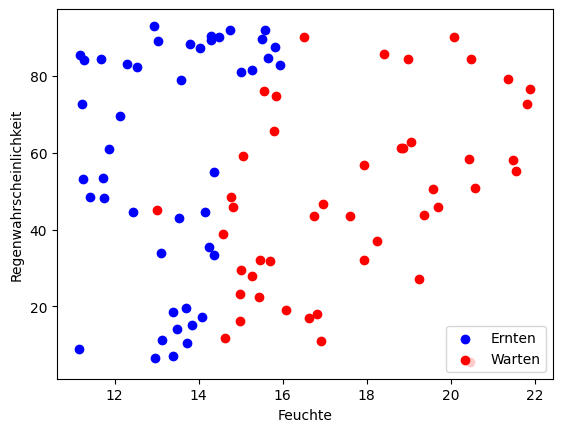

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
data = pd.read_csv('ErnteBauern.csv')

# Daten nach Ergebnis filtern
ernten = data[data['Ergebnis'] == 'Ernten']
warten = data[data['Ergebnis'] == 'Warten']

# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label="Ernten")
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label="Warten")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

plt.legend()
#
# Diagramm anzeigen
plt.show()


Aufteilen in zwei Mengen

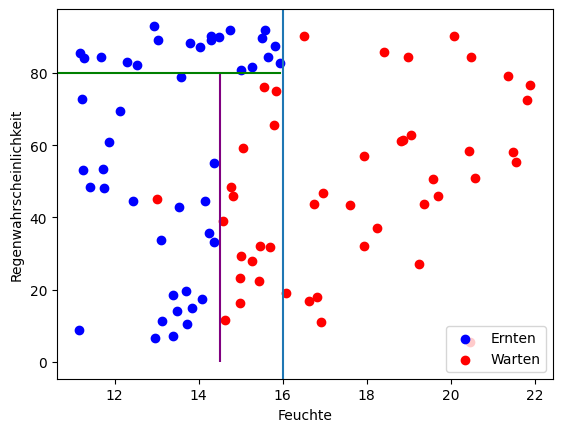

In [62]:

# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16,ymin=0)

plt.vlines(x=14.5, ymin=0, ymax=80, color='purple')


# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


In [86]:
m1 = data[data['Feuchte'] < 16]
m2 = data[data['Feuchte'] >= 16]

m2

,Feuchte,Regenwahrscheinlichkeit,Ergebnis
0,17.94,56.89,Warten
3,18.25,36.97,Warten
4,16.52,90.11,Warten
8,19.59,50.62,Warten
13,17.93,32.04,Warten
16,19.37,43.79,Warten
20,20.58,50.79,Warten
23,16.97,46.66,Warten
25,21.37,79.13,Warten
40,18.99,84.35,Warten


Die Formel zur Berechnung der Wahrscheinlichkeit eines Ereignisses ist:

$$P(x_i) = \frac{n_i}{N}$$

wobei $n_i$ die Anzahl der Beispiele ist, in denen das Element $x_i$ auftritt und $N$ die Gesamtzahl der Beispiele im Array ist.

Die Shannon-Entropie-Formel zur Berechnung der Entropie lautet wie folgt:

$$H(X) = -\sum_{i=1}^n P(x_i) \log_2(P(x_i))$$

wobei $P(x_i)$ die Wahrscheinlichkeit des Ereignisses $x_i$ ist und $\log_2$ der Logarithmus zur Basis 2 ist.

In [124]:
import math

def calcEntropie(m):
    N=len(m)
    n_ernten=0
    n_warten=0
    for i in m["Ergebnis"]:
        if i=="Ernten":
            n_ernten=n_ernten+1;
        if i=="Warten":
            n_warten=n_warten+1;
    #print("Anzahl von Ernten="+str(n_ernten))
    #print("Anzahl von Warten="+str(n_warten))
    if (n_ernten==0):
        return None
    if (n_warten==0):
        return None
    P_ernten=n_ernten/N
    P_warten=n_warten/N
    #print("Wahrscheinlichkeit Ernten="+str(P_ernten))
    #print("Wahrscheinlichkeit Warten="+str(P_warten))
    if P_ernten==0:
        return 0;
    if P_warten==0:
        return 0;
    E=-1*(P_ernten*math.log2(P_ernten)+P_warten*math.log2(P_warten))
    return E

e1=calcEntropie(m1)
print("Entropie e1 ist "+str(e1))
e2=calcEntropie(m2)
print("Entropie e2 ist "+str(e2))

Entropie e1 ist 1.0
Entropie e2 ist None


In [130]:
dat= []
for i in range(110,220):
    m1 = data[data['Feuchte'] < i/10]
    m2 = data[data['Feuchte'] >= i/10]
    e1=calcEntropie(m1)
    e2=calcEntropie(m2)
    #print("i="+str(i/10))
    #print("e1="+str(e1))
    #print("e2="+str(e2))
    dat.append([i/10,e1,e2])

df=pd.DataFrame(dat)
df

,0,1,2
0,11.0,NaN,0.999913
1,11.1,NaN,0.999913
2,11.2,NaN,0.999180
3,11.3,NaN,0.996486
4,11.4,NaN,0.996486
...,...,...,...
105,21.5,0.999627,NaN
106,21.6,0.999909,NaN
107,21.7,0.999909,NaN
108,21.8,0.999909,NaN


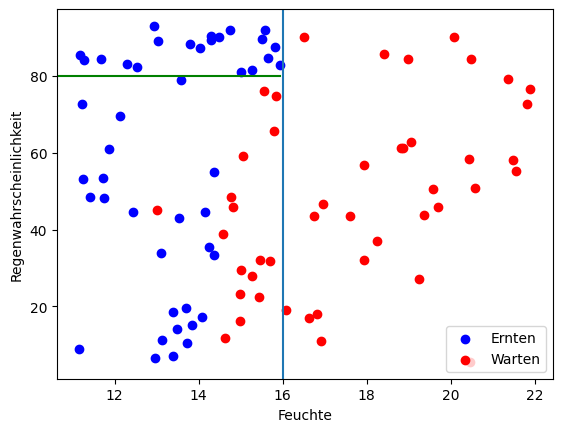

In [ ]:


# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16)

# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


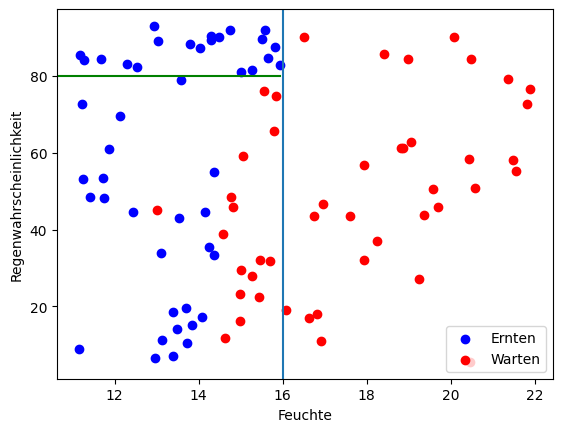

In [ ]:


# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16)

# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


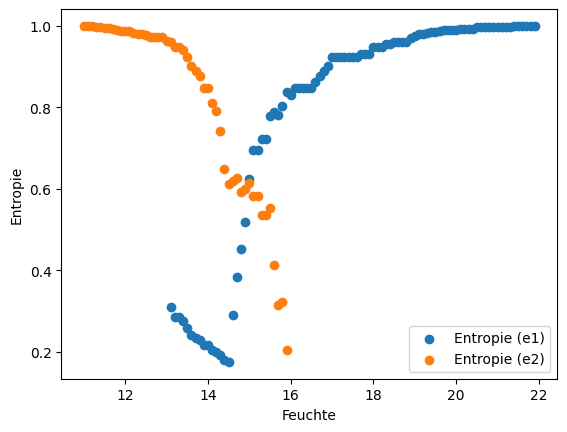

In [131]:
import numpy as np
arr=np.array(dat)
# Diagramm erstellen

x_data = [row[0] for row in arr]
y1_data = [row[1] for row in arr]
y2_data = [row[2] for row in arr]

plt.scatter(x_data,y1_data,label="Entropie (e1)")
plt.scatter(x_data,y2_data,label="Entropie (e2)")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Entropie')

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.show()

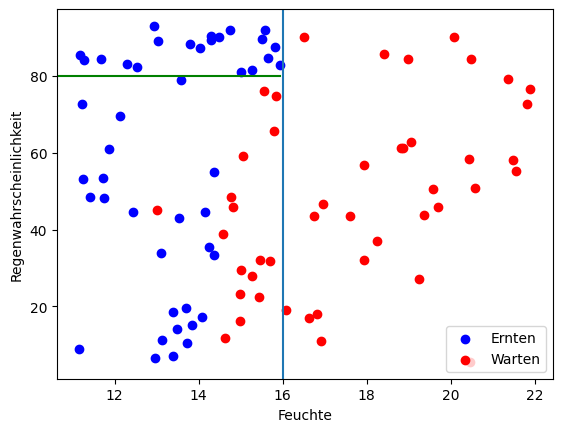

In [ ]:


# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16)

# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


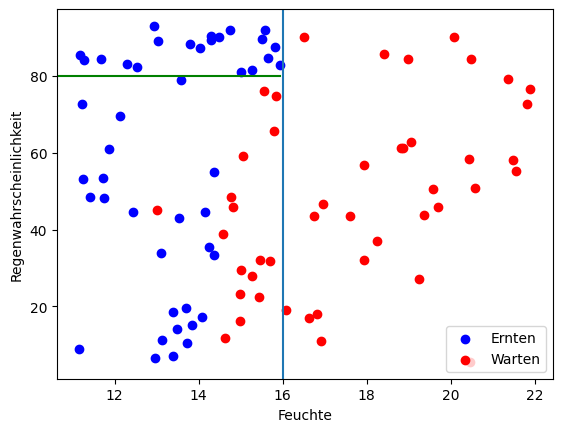

In [ ]:


# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16)

# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


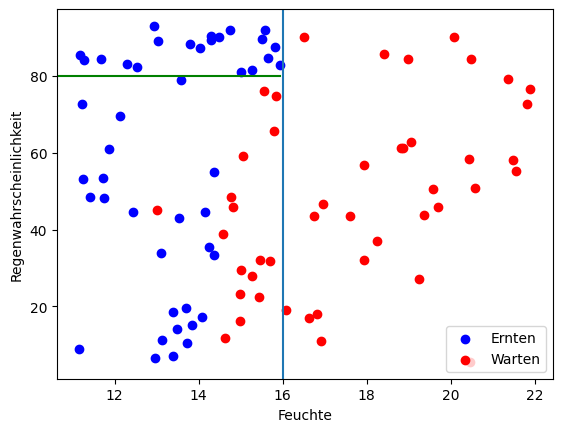

In [ ]:


# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16)

# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()


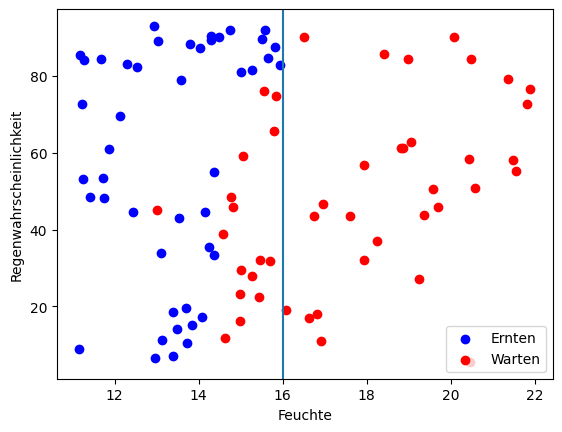

In [38]:
# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label="Ernten")
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label="Warten")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

plt.legend()
#
# Diagramm anzeigen
plt.axvline(x=16)
plt.show()



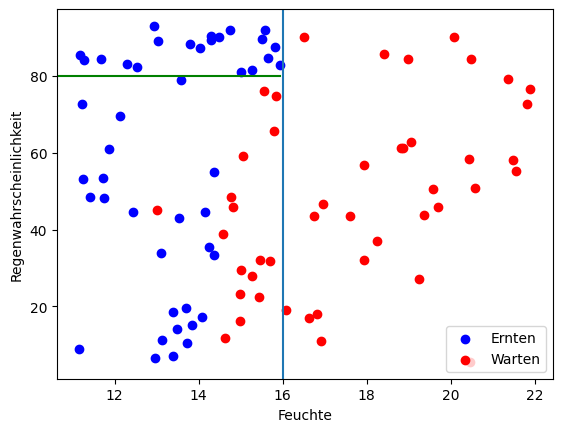

In [60]:


# Diagramm erstellen
plt.scatter(ernten['Feuchte'], ernten['Regenwahrscheinlichkeit'], color='blue', label='Ernten')
plt.scatter(warten['Feuchte'], warten['Regenwahrscheinlichkeit'], color='red', label='Warten')

# Achsenbeschriftungen hinzufügen
plt.xlabel('Feuchte')
plt.ylabel('Regenwahrscheinlichkeit')

# Legende hinzufügen
plt.legend()

# Senkrechte Linie bei x=16 zeichnen
plt.axvline(x=16)

# Horizontale Linie bei y=80 und x=15.5 zeichnen
plt.axhline(y=80, xmin=0, xmax=16/35.5, color='green')

# Diagramm anzeigen
plt.show()
